In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import drive

#drive.mount('/content/gdrive')
df = pd.read_csv('df.csv')
df.head()


,id,gender,AgeGroup,Height,Weight,Foot_Size,Product_Size,Rating,Item_Code,Sum_Code,Item_Name,Tags,Dept
0,439847_1,男性,NaN,身長: 121 - 130cm,NaN,NaN,購入サイズ: 130,4,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11
1,439847_2,女性,10 - 14歳,NaN,NaN,NaN,購入サイズ: 150,4,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11
2,439847_3,男性,NaN,身長: 151 - 155cm,NaN,NaN,購入サイズ: 160,4,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11
3,439847_4,女性,NaN,NaN,NaN,NaN,購入サイズ: 130,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11
4,439847_5,男性,7 - 9歳,身長: 111 - 120cm,体重: 16 - 20kg,足のサイズ: 21.5cm以下,購入サイズ: 120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11


In [3]:
df.columns=['ID', 'Gender', 'Age_Group', 'Height', 'Weight', 'Foot_Size',
       'Product_Size', 'Rating', 'Item_Code','Sum_Code','Item_Name','Tags','Dept']

In [4]:
df['Height']=df['Height'].apply(lambda x:str(x).replace('身長: ','')).apply(lambda x:str(x).replace('"',''))
df['Weight']=df['Weight'].apply(lambda x:str(x).replace('体重: ',''))
df['Product_Size']=df['Product_Size'].apply(lambda x:str(x).replace('購入サイズ: ',''))
df['Foot_Size']=df['Foot_Size'].apply(lambda x:str(x).replace('足のサイズ: ',''))



In [5]:
df=df.replace('回答しない', np.nan)
df=df.replace('その他', np.nan)
df=df.replace('nan', np.nan)
#df.drop('ID',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47219 entries, 0 to 47218
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            47219 non-null  object
 1   Gender        46666 non-null  object
 2   Age_Group     39976 non-null  object
 3   Height        40086 non-null  object
 4   Weight        35481 non-null  object
 5   Foot_Size     30444 non-null  object
 6   Product_Size  46951 non-null  object
 7   Rating        47219 non-null  int64 
 8   Item_Code     47219 non-null  int64 
 9   Sum_Code      47219 non-null  object
 10  Item_Name     47219 non-null  object
 11  Tags          47219 non-null  object
 12  Dept          47219 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 4.7+ MB


In [7]:
#df no Foot Size
df_nfs=df.copy()
df_nfs.drop('Foot_Size',axis=1,inplace=True)

In [8]:
#df data left_dropna
print(len(df))
print(len(df.dropna()))
print(len(df.dropna())/len(df))
df.dropna(inplace=True)


47219
28663
0.6070225968360194


In [9]:
#data left_dropna
print(len(df_nfs))
print(len(df_nfs.dropna()))
print(len(df_nfs.dropna())/len(df_nfs))
df_nfs.dropna(inplace=True)


47219
33712
0.7139498930515259


In [10]:
# Data Cleaning

def gender_eng(x):
    if x=='男性':
        return 'Male'
    if x=='女性':
        return 'Female'


df['Gender']=df['Gender'].apply(lambda x:gender_eng(x))
df_nfs['Gender']=df_nfs['Gender'].apply(lambda x:gender_eng(x))



In [11]:
df=df[(df['Age_Group']!='10歳以下')&(df['Age_Group']!='0 - 6ヶ月')&(df['Age_Group']!='0 - 3ヶ月')&(df['Age_Group']!='7 - 9ヶ月')&(df['Age_Group']!='10 - 12ヶ月')&(df['Age_Group']!='7 - 12ヶ月')&(df['Age_Group']!='4 - 6ヶ月')]
df_nfs=df_nfs[(df_nfs['Age_Group']!='10歳以下')&(df_nfs['Age_Group']!='0 - 6ヶ月')&(df_nfs['Age_Group']!='0 - 3ヶ月')&(df_nfs['Age_Group']!='7 - 9ヶ月')&(df_nfs['Age_Group']!='10 - 12ヶ月')&(df_nfs['Age_Group']!='7 - 12ヶ月')&(df_nfs['Age_Group']!='4 - 6ヶ月')]


def Age_impute(x,y,z):
    if x=='10代':
        if z=='Female':
            if y in ['141 - 150cm', '151 - 155cm', '131 - 140cm','121 - 130cm']:
                return '10 - 14歳'
            else:
                return '15 - 19歳'
        if z=='Male':
            if y in ['91 - 95cm','141 - 150cm', '151 - 155cm', '131 - 140cm','121 - 130cm','156 - 160cm']:
                return '10 - 14歳'
            else:
                return '15 - 19歳'
            
    if x=='10歳以下':
        if z=='Female':
            if y in ['141 - 150cm', '151 - 155cm', '131 - 140cm','121 - 130cm']:
                return '10 - 14歳'
            else:
                return '15 - 19歳'
        if z=='Male':
            if y in ['91 - 95cm','141 - 150cm', '151 - 155cm', '131 - 140cm','121 - 130cm','156 - 160cm']:
                return '10 - 14歳'
            else:
                return '15 - 19歳'
    
    
    
            
    elif x=='3 - 6歳':
        return '4 - 6歳'
    
    else:
        return x

df['Age_Group']=df.apply(lambda df:Age_impute(df['Age_Group'],df['Height'],df['Gender']), axis=1)
df_nfs['Age_Group']=df_nfs.apply(lambda df_nfs:Age_impute(df_nfs['Age_Group'],df_nfs['Height'],df_nfs['Gender']), axis=1)


def Age_eng(x):
    if x=='10 - 14歳':
        return '10-14'
    elif x=='7 - 9歳':
        return '7-9'
    elif x=='4 - 6歳':
        return '4-6'
    elif x=='30代':
        return '30-39'
    elif x=='2 - 3歳':
        return '2-3'
    elif x=='40代':
        return '40-49'
    elif x=='20代':
        return '20-29'
    elif x=='15 - 19歳':
        return '15-19'
    elif x=='50代':
        return '50-59'
    elif x=='60代以上':
        return '60<'
    elif x=='13 - 24ヶ月':
        return '<2'
    else:
        return x
    
df['Age_Group']=df['Age_Group'].apply(lambda x:Age_eng(x))    
df_nfs['Age_Group']=df_nfs['Age_Group'].apply(lambda x:Age_eng(x))        
    



In [12]:
df['Height'].unique()

array(['111 - 120cm', '141 - 150cm', '121 - 130cm', '101 - 110cm',
       '131 - 140cm', '91 - 100cm', '156 - 160cm', '151 - 155cm',
       '161 - 165cm', '81 - 90cm', '166 - 170cm', '96 - 100cm',
       '181 - 185cm', '171 - 175cm', '91 - 95cm', '71 - 80cm',
       '176 - 180cm', '81 - 85cm', '86 - 90cm', '51 - 60cm', '61 - 70cm',
       '65cm以下', '191cm以上', '50cm以下', '186 - 190cm', '76 - 80cm',
       '66 - 70cm', '71 - 75cm', '181cm以上'], dtype=object)

In [13]:
df=df[(df['Height']!='81 - 85cm')&(df['Height']!='50cm以下')&(df['Height']!='65cm以下')&(df['Height']!='61 - 70cm')&(df['Height']!='51 - 60cm')&(df['Height']!='71 - 80cm')]
df_nfs=df_nfs[(df_nfs['Height']!='81 - 85cm')&(df_nfs['Height']!='50cm以下')&(df_nfs['Height']!='65cm以下')&(df_nfs['Height']!='61 - 70cm')&(df_nfs['Height']!='51 - 60cm')&(df_nfs['Height']!='71 - 80cm')]

def Height_impute(x):
    if x in ['91 - 100cm','81 - 90cm','96 - 100cm','91 - 95cm','86 - 90cm', '66 - 70cm','71 - 75cm']:
        return '100 cm >='
    elif x in ['181cm以上','191cm以上', '186 - 190cm','181 - 185cm']:
        return '>180 cm '
    elif x=='76 - 80cm': 
        return '176 - 180cm'
    else:
        return x
        
df['Height']=df['Height'].apply(lambda x: Height_impute(x))
df_nfs['Height']=df_nfs['Height'].apply(lambda x: Height_impute(x))

In [14]:
df=df[(df['Weight']!='5kg以下')]
df_nfs=df_nfs[(df_nfs['Weight']!='5kg以下')]


def Weight_impute(x):
    if x =='9 - 12kg':
        return '13kg >'
    else:
        return x
        
df['Weight']=df['Weight'].apply(lambda x: Weight_impute(x))
df_nfs['Weight']=df_nfs['Weight'].apply(lambda x: Weight_impute(x))

In [15]:
df.Foot_Size.unique()

array(['21.5cm以下', '23.0cm', '22.5cm', '25.0cm', '22.0cm', '24.5cm',
       '23.5cm', '24.0cm', '25.5cm', '26.5cm', '27.5cm', '27.0cm',
       '26.0cm', '29.0cm', '28.5cm', '28.0cm', '22.0cm以下', '30.0cm以上',
       '29.5cm', '28.0cm以上'], dtype=object)

In [16]:
def Foot_Size_impute(x):
    if x in ['21.5cm以下','22.0cm以下']:
        return '22.0cm >'
    if x in ['28.0cm以上','29.5cm','30.0cm以上','28.5cm','29.0cm']:
        return '>28.0cm'
    else:
        return x
    
df['Foot_Size']=df['Foot_Size'].apply(lambda x: Foot_Size_impute(x))


In [17]:
df_nfs.reset_index(drop=True,inplace=True)
df.reset_index(drop=True,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28371 entries, 0 to 28370
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            28371 non-null  object
 1   Gender        28371 non-null  object
 2   Age_Group     28371 non-null  object
 3   Height        28371 non-null  object
 4   Weight        28371 non-null  object
 5   Foot_Size     28371 non-null  object
 6   Product_Size  28371 non-null  object
 7   Rating        28371 non-null  int64 
 8   Item_Code     28371 non-null  int64 
 9   Sum_Code      28371 non-null  object
 10  Item_Name     28371 non-null  object
 11  Tags          28371 non-null  object
 12  Dept          28371 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 2.8+ MB


In [19]:
df_nfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33359 entries, 0 to 33358
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            33359 non-null  object
 1   Gender        33359 non-null  object
 2   Age_Group     33359 non-null  object
 3   Height        33359 non-null  object
 4   Weight        33359 non-null  object
 5   Product_Size  33359 non-null  object
 6   Rating        33359 non-null  int64 
 7   Item_Code     33359 non-null  int64 
 8   Sum_Code      33359 non-null  object
 9   Item_Name     33359 non-null  object
 10  Tags          33359 non-null  object
 11  Dept          33359 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


In [20]:
df_nfs['Age_Group'].unique()

array(['7-9', '10-14', '4-6', '30-39', '2-3', '20-29', '40-49', '15-19',
       '50-59', '60<', '<2'], dtype=object)

In [21]:
df.isna().sum()

ID              0
Gender          0
Age_Group       0
Height          0
Weight          0
Foot_Size       0
Product_Size    0
Rating          0
Item_Code       0
Sum_Code        0
Item_Name       0
Tags            0
Dept            0
dtype: int64

In [22]:
df_nfs.isna().sum()

ID              0
Gender          0
Age_Group       0
Height          0
Weight          0
Product_Size    0
Rating          0
Item_Code       0
Sum_Code        0
Item_Name       0
Tags            0
Dept            0
dtype: int64

<AxesSubplot:>

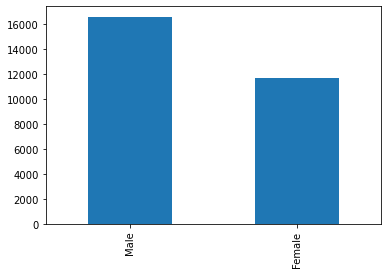

In [23]:
df['Gender'].value_counts().plot.bar()

<AxesSubplot:>

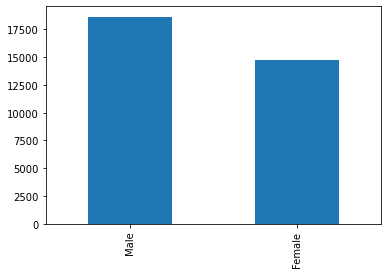

In [24]:
df_nfs['Gender'].value_counts().plot.bar()

In [25]:
df['Item_Sex']=df['Item_Name'].apply(lambda x:x[:1])
df_nfs['Item_Sex']=df_nfs['Item_Name'].apply(lambda x:x[:1])

In [26]:
df

,ID,Gender,Age_Group,Height,Weight,Foot_Size,Product_Size,Rating,Item_Code,Sum_Code,Item_Name,Tags,Dept,Item_Sex
0,439847_5,Male,7-9,111 - 120cm,16 - 20kg,22.0cm >,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
1,439847_6,Male,10-14,141 - 150cm,31 - 35kg,23.0cm,150,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
2,439847_7,Male,4-6,111 - 120cm,21 - 25kg,22.0cm >,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
3,439847_9,Male,4-6,121 - 130cm,21 - 25kg,22.0cm >,130,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
4,439847_13,Male,30-39,101 - 110cm,16 - 20kg,22.0cm >,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28366,445086_78,Female,40-49,161 - 165cm,56 - 60kg,24.5cm,24,5,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
28367,445086_79,Female,40-49,161 - 165cm,61 - 65kg,24.5cm,24.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
28368,445086_80,Male,50-59,171 - 175cm,61 - 65kg,25.5cm,25.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
28369,445086_82,Male,40-49,166 - 170cm,66 - 70kg,25.5cm,25.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M


In [27]:
df_nfs

,ID,Gender,Age_Group,Height,Weight,Product_Size,Rating,Item_Code,Sum_Code,Item_Name,Tags,Dept,Item_Sex
0,439847_5,Male,7-9,111 - 120cm,16 - 20kg,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
1,439847_6,Male,10-14,141 - 150cm,31 - 35kg,150,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
2,439847_7,Male,4-6,111 - 120cm,21 - 25kg,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
3,439847_9,Male,4-6,121 - 130cm,21 - 25kg,130,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
4,439847_13,Male,30-39,101 - 110cm,16 - 20kg,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33354,445086_78,Female,40-49,161 - 165cm,56 - 60kg,24,5,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
33355,445086_79,Female,40-49,161 - 165cm,61 - 65kg,24.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
33356,445086_80,Male,50-59,171 - 175cm,61 - 65kg,25.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
33357,445086_82,Male,40-49,166 - 170cm,66 - 70kg,25.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M


In [29]:
df.Age_Group.unique()

array(['7-9', '10-14', '4-6', '30-39', '2-3', '20-29', '40-49', '15-19',
       '50-59', '60<', '<2'], dtype=object)

In [30]:
df.Height.unique()

array(['111 - 120cm', '141 - 150cm', '121 - 130cm', '101 - 110cm',
       '131 - 140cm', '100 cm >=', '156 - 160cm', '151 - 155cm',
       '161 - 165cm', '166 - 170cm', '>180 cm ', '171 - 175cm',
       '176 - 180cm'], dtype=object)

In [31]:
df.Weight.unique()

array(['16 - 20kg', '31 - 35kg', '21 - 25kg', '26 - 30kg', '36 - 40kg',
       '13 - 15kg', '13kg >', '41 - 45kg', '46 - 50kg', '51 - 55kg',
       '91kg以上', '61 - 65kg', '56 - 60kg', '71 - 75kg', '66 - 70kg',
       '81 - 85kg', '76 - 80kg', '86 - 90kg'], dtype=object)

In [32]:
df.Foot_Size.unique()

array(['22.0cm >', '23.0cm', '22.5cm', '25.0cm', '22.0cm', '24.5cm',
       '23.5cm', '24.0cm', '25.5cm', '26.5cm', '27.5cm', '27.0cm',
       '26.0cm', '>28.0cm', '28.0cm'], dtype=object)

## Items chosen by Gender

([<matplotlib.patches.Wedge at 0x7f8648b0ea60>,
 [Text(1.0554422683381766, 0.30990582150899426, ''),
  Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-1.0861827821463492, 0.1738015068082446, ''),
  Text(0.6661706591627486, -0.8753380220638591, '')],
 [Text(0.5756957827299144, 0.16903953900490593, '9%'),
  Text(0.2999999837833699, 0.5196152516333385, '15%'),
  Text(-0.5924633357161905, 0.09480082189540613, '46%'),
  Text(0.36336581408877194, -0.47745710294392313, '29%')])

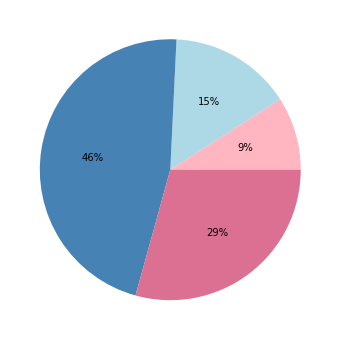

In [33]:
colors = ['lightpink','lightblue','steelblue','palevioletred']
plt.figure(figsize=(8,6))
plt.pie(df_nfs.groupby('Item_Sex').Item_Code.nunique(),colors=colors,autopct='%.0f%%')

## Men's items reviewed by gender

([<matplotlib.patches.Wedge at 0x7f8648ce3250>,
 [Text(-1.0010691383753723, 0.4559172953424665, ''),
  Text(1.0010691383753725, -0.4559172953424661, '')],
 [Text(-0.546037711841112, 0.24868216109589078, '86%'),
  Text(0.5460377118411123, -0.24868216109589059, '14%')])

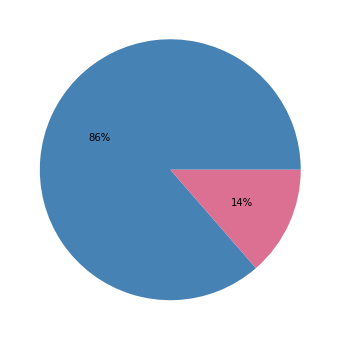

In [34]:
colors = ['steelblue','palevioletred']
plt.figure(figsize=(8,6))
plt.pie(df_nfs[df_nfs.Item_Sex=='M'].Gender.value_counts(),colors=colors,autopct='%.0f%%')

In [35]:
#Those 14% includes pants, implying special size chance for women pants and unisex strategy works for tops items

## Kids' items worn by adults

/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_6787/1856677104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kids['adult'] = kids.Age_Group.apply(lambda x: 1 if x in adult else 0)


([<matplotlib.patches.Wedge at 0x7f8651c18ee0>,
 [Text(-1.0284813868493201, 0.39016155231454996, ''),
  Text(1.0284814233788766, -0.390161456021171, '')],
 [Text(-0.5609898473723564, 0.2128153921715727, '88%'),
  Text(0.560989867297569, -0.21281533964791144, '12%')])

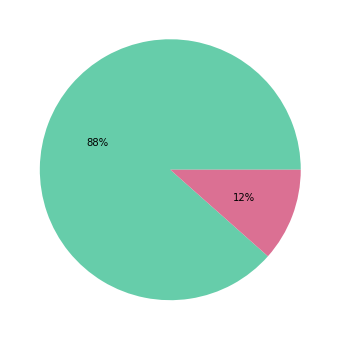

In [36]:
adult = ['20-29','30-39','40-49','50-59','60<']
kids = df_nfs[(df_nfs.Item_Sex=='K')|(df_nfs.Item_Sex=='G')]
kids['adult'] = kids.Age_Group.apply(lambda x: 1 if x in adult else 0)

colors = ['mediumaquamarine','palevioletred']
plt.figure(figsize=(8,6))
plt.pie(kids.adult.value_counts(),colors=colors,autopct='%.0f%%')

In [37]:
#Kids items are cheaper, design/material differentiation from adult for similar items
#For items without similar design in women category, guarantee 150-160cm invenotry to trade up womens' baskets

## Which age group leaves the most reviews?

<AxesSubplot:xlabel='Age_Group'>

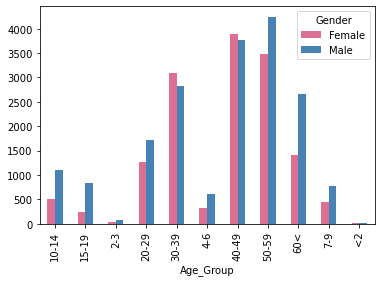

In [38]:
df_nfs.groupby('Age_Group').Gender.value_counts().sort_values(ascending=False).unstack().plot(kind='bar',color=['palevioletred','steelblue'])

In [39]:
#Review mainly come from 50-59, followed by 40-49 and 30-39 (high age groups)
#so there is a need to capture more younsters reviews

## Which dept has the most reivews?

<AxesSubplot:>

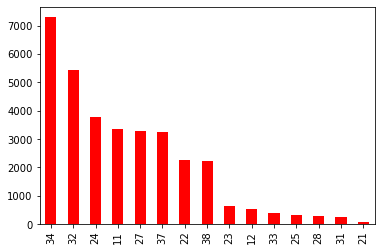

In [40]:
df_nfs.Dept.value_counts().plot.bar(color='r')
#df_nfs.groupby('Dept').Item_Code.nunique().plot.bar()

## Height distribution by gender

<AxesSubplot:>

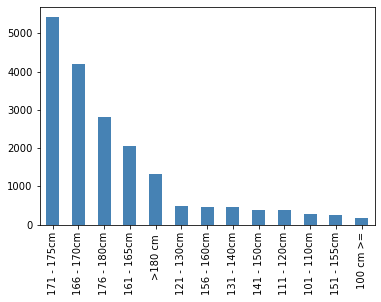

In [41]:
df_nfs[df_nfs.Gender=="Male"].Height.value_counts().plot.bar(color='steelblue')

<AxesSubplot:>

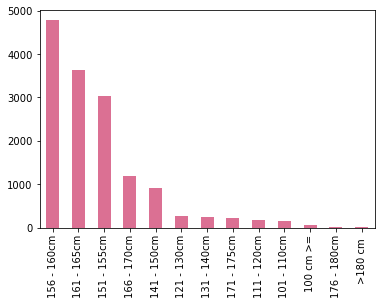

In [42]:
df_nfs[df_nfs.Gender=="Female"].Height.value_counts().plot.bar(color='palevioletred')

## Weight distribution by gender

<AxesSubplot:>

/Users/chunghangkwok/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chunghangkwok/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chunghangkwok/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/chunghangkwok/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0, flags=flags)


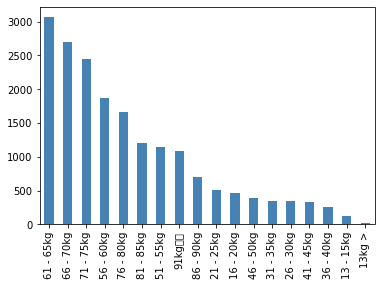

In [43]:
df_nfs[df_nfs.Gender=="Male"].Weight.value_counts().plot.bar(color='steelblue')

<AxesSubplot:>

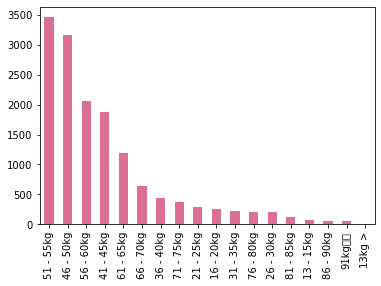

In [44]:
df_nfs[df_nfs.Gender=="Female"].Weight.value_counts().plot.bar(color='palevioletred')

## Rating split

([<matplotlib.patches.Wedge at 0x7f86519ead90>,
 [Text(-0.4179472041938173, 1.017506822830477, ''),
  Text(0.10039703210383064, -1.0954087985518204, ''),
  Text(1.00943425238616, -0.43708407670560906, ''),
  Text(1.0855672179132565, -0.17760578648251396, ''),
  Text(1.0985193917427054, -0.057053886504222585, '')],
 [Text(-0.2279712022875367, 0.5550037215438965, '62%'),
  Text(0.05476201751118034, -0.5974957083009929, '28%'),
  Text(0.5506005013015417, -0.23840949638487763, '6%'),
  Text(0.5921275734072308, -0.0968758835359167, '2%'),
  Text(0.5991923954960211, -0.03112030172957595, '2%')])

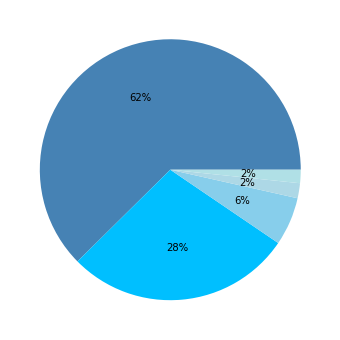

In [45]:
colors = ['steelblue','deepskyblue','skyblue','lightblue','powderblue']
plt.figure(figsize=(8,6))
plt.pie(df_nfs.Rating.value_counts(), colors=colors, autopct='%.0f%%')
#dark to light: 5 to 1 rating

In [46]:
item_rating = df_nfs.groupby('Item_Name').Rating.value_counts().unstack()
item_rating = pd.DataFrame(item_rating)
item_rating = item_rating.fillna(0)
item_rating.reset_index(inplace=True)
item_rating['total']=item_rating[1]+item_rating[2]+item_rating[3]+item_rating[4]+item_rating[5]
item_rating['bad'] = item_rating[1]+item_rating[2]
item_rating['bad%'] = item_rating['bad']/item_rating['total']*100
item_rating['good%'] = item_rating[5]/item_rating['total']*100
item_rating['Item_Sex'] = item_rating['Item_Name'].apply(lambda x:x[:1])
item_rating

Rating,Item_Name,1,2,3,4,5,total,bad,bad%,good%,Item_Sex
0,G's airism cotton blend camisole,1.0,3.0,7.0,24.0,55.0,90.0,4.0,4.444444,61.111111,G
1,G's airism first bra,1.0,1.0,0.0,23.0,26.0,51.0,2.0,3.921569,50.980392,G
2,G's airism uv protection soft leggings,0.0,1.0,6.0,17.0,41.0,65.0,1.0,1.538462,63.076923,G
3,G's leggings,0.0,2.0,11.0,25.0,91.0,129.0,2.0,1.550388,70.542636,G
4,G's ribbed mellow ankle length leggings,1.0,4.0,9.0,7.0,21.0,42.0,5.0,11.904762,50.000000,G
...,...,...,...,...,...,...,...,...,...,...,...
91,W's uv protection crew neck long sleeve cardigan,1.0,0.0,3.0,52.0,110.0,166.0,1.0,0.602410,66.265060,W
92,W's uv protection long sleeve slit t-shirt,0.0,2.0,15.0,78.0,119.0,214.0,2.0,0.934579,55.607477,W
93,W's wide straight pants,2.0,2.0,12.0,65.0,91.0,172.0,4.0,2.325581,52.906977,W
94,W's wireless bra (3d hold),23.0,25.0,61.0,196.0,299.0,604.0,48.0,7.947020,49.503311,W


## Top 3 best reviews items by category

In [47]:
item_rating[item_rating.Item_Sex=="M"].sort_values(by='good%',ascending=False).head(3)

Rating,Item_Name,1,2,3,4,5,total,bad,bad%,good%,Item_Sex
43,M's indigo dye sweat cardigan,0.0,2.0,5.0,26.0,109.0,142.0,2.0,1.408451,76.760563,M
34,M's denim work jacket,0.0,0.0,0.0,19.0,60.0,79.0,0.0,0.000000,75.949367,M
56,M's u airism cotton crew neck oversized t-shrt,2.0,8.0,19.0,157.0,572.0,758.0,10.0,1.319261,75.461741,M


In [48]:
item_rating[item_rating.Item_Sex=="W"].sort_values(by='good%',ascending=False).head(3)

Rating,Item_Name,1,2,3,4,5,total,bad,bad%,good%,Item_Sex
81,W's ribbed cropped short sleeve t-shirt,0.0,0.0,3.0,10.0,33.0,46.0,0.0,0.000000,71.739130,W
74,W's cotton relaco shorts,0.0,1.0,7.0,31.0,95.0,134.0,1.0,0.746269,70.895522,W
76,W's lace shorts (hiphugger),1.0,2.0,4.0,22.0,62.0,91.0,3.0,3.296703,68.131868,W


In [49]:
item_rating[item_rating.Item_Sex=="K"].sort_values(by='good%',ascending=False).head(3)

Rating,Item_Name,1,2,3,4,5,total,bad,bad%,good%,Item_Sex
19,K's ultra stretch dry sweat full zip hoodie,0.0,0.0,5.0,30.0,112.0,147.0,0.0,0.000000,76.190476,K
16,K's u airism cotton crew neck t-shirt,1.0,3.0,8.0,69.0,240.0,321.0,4.0,1.246106,74.766355,K
7,K's airism cotton blend tank top,1.0,2.0,10.0,42.0,153.0,208.0,3.0,1.442308,73.557692,K


In [50]:
#Overall speaking, new indigo collection and airism cotton items have best rating
#implies color strategy/line extension opportunities
#show pics in ppt

## Top 5 worst reviews items

In [51]:
item_rating.sort_values(by='bad%',ascending=False).head()

Rating,Item_Name,1,2,3,4,5,total,bad,bad%,good%,Item_Sex
77,W's mid rise briefs,9.0,7.0,8.0,9.0,25.0,58.0,16.0,27.586207,43.103448,W
64,M's unisex washable room shoes,19.0,10.0,17.0,71.0,83.0,200.0,29.0,14.500000,41.500000,M
4,G's ribbed mellow ankle length leggings,1.0,4.0,9.0,7.0,21.0,42.0,5.0,11.904762,50.000000,G
94,W's wireless bra (3d hold),23.0,25.0,61.0,196.0,299.0,604.0,48.0,7.947020,49.503311,W
68,W's airism bra sleeveless top,27.0,23.0,39.0,183.0,379.0,651.0,50.0,7.680492,58.218126,W


In [52]:
#Customer center and merchandising team should further check the comments why 1/2 rating was given
#esp. for W's inner department, 3 out 5 items on the list
#show pics in ppt

In [53]:
df_nfs

,Gender,Age_Group,Height,Weight,Product_Size,Rating,Item_Code,Sum_Code,Item_Name,Tags,Dept,Item_Sex
0,Male,7-9,111 - 120cm,16 - 20kg,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
1,Male,10-14,141 - 150cm,31 - 35kg,150,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
2,Male,4-6,111 - 120cm,21 - 25kg,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
3,Male,4-6,121 - 130cm,21 - 25kg,130,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
4,Male,30-39,101 - 110cm,16 - 20kg,120,5,439847,11727Z,K's ultra stretch denim slim fit pants,"bottoms, ultra stretch",11,K
...,...,...,...,...,...,...,...,...,...,...,...,...
33354,Female,40-49,161 - 165cm,56 - 60kg,24,5,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
33355,Female,40-49,161 - 165cm,61 - 65kg,24.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
33356,Male,50-59,171 - 175cm,61 - 65kg,25.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
33357,Male,40-49,166 - 170cm,66 - 70kg,25.5,4,445086,12588Z,M's cotton canvas lace up sneakers,"sneakers, unisex",38,M
